## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns

### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

In [134]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [135]:
columns = ['ram', 'storage', 'screen', 'final_price']
df = df[columns]


### EDA

* Look at the 'final_price' variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

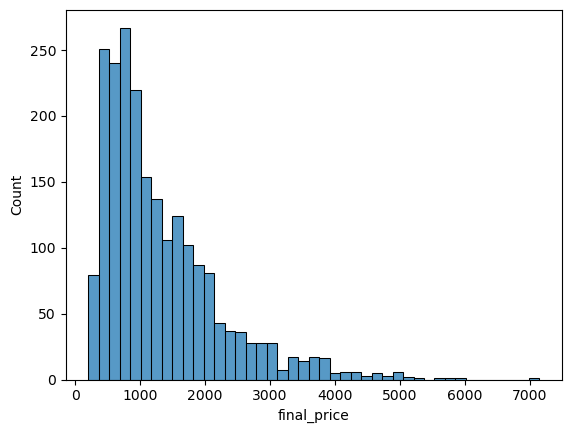

In [136]:
sns.histplot(df['final_price'])

### Question 1: Feature with missing values

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [137]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Ans 1: screen

### Question 2: Median for population (RAM)

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [138]:
df['ram'].median()

16.0

### Ans 2: 16.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [139]:
n = len(df)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val + n_test)

print(n, n_train, n_val, n_test)

2160 1296 432 432


In [140]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [141]:

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Question 3: Filling NAs (Mean vs zero)

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

線性回歸模型（Linear Regression Model）是一種簡單的迴歸分析技術，用於建模變數之間的線性關係。它的目標是通過找到一條直線來描述自變數（輸入特徵）和因變數（輸出或目標）的關係，以便對未來的數據進行預測。


線性回歸模型（Linear Regression Model）是一種簡單的迴歸分析技術，用於建模變數之間的線性關係。它的目標是通過找到一條直線來描述自變數（輸入特徵）和因變數（輸出或目標）的關係，以便對未來的數據進行預測。

優點：
* 訓練快速，適合處理大量數據。
* 結果易於解釋，模型的權重可以直接解釋每個特徵對結果的影響。
* 對數據具有線性關係時表現良好。

缺點：
* 當特徵和目標之間的關係不是線性時，線性回歸表現不佳。
* 對於高維數據或多重共線性問題，模型的預測準確性會下降（可以通過正則化進行改進）。

RMSE（Root Mean Squared Error，均方根誤差）是一個用來衡量模型預測值與實際值之間差距的評估指標，主要用於迴歸模型的評估。RMSE 的值越小，表示模型的預測越準確。均方誤差（MSE, Mean Squared Error）。

RMSE 的優缺點：
* 優點：RMSE 能夠反映較大誤差的影響，對於精度要求高的應用非常有效。
* 缺點：對於異常值比較敏感，因此在資料中如果有極端值，RMSE 會放大其影響。

In [142]:
def train_linear_regression(X, y):
    ones =np.ones(X.shape[0])
    X= np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred -y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

with mean:

In [143]:
mean = df_train.ram.mean()

X_train = prepare_X(df_train, fillna_value = mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

600.363763034522

with 0:

In [144]:
X_train = prepare_X(df_train, fillna_value = 0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)


597.3635593619621

### Ans 3: with 0

### Question 4: Regularization 正則化

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

線性回歸的正則化，其中使用了L2 正則化（即 Ridge Regression）。L2 正則化的目的是通過添加一個懲罰項，防止模型過擬合（即避免過於複雜的模型在訓練數據上表現良好但在新數據上表現不佳）。

```python
reg = r * np.eye(XTX.shape[0])
```

這行程式碼創建一個與 XTX 尺寸相同的對角矩陣，並將它乘以一個正則化參數 r。對角矩陣的作用是確保只對係數的平方施加懲罰，而不改變線性回歸模型的基本結構。
np.eye(XTX.shape[0]) 會生成一個與 XTX 同大小的單位矩陣（對角線為 1，其餘元素為 0），這是 Ridge Regression 的正則化項。
r 是正則化強度，數值越大，懲罰越強。

選擇正則化參數 r：
正則化參數 r 的選擇非常關鍵。r 值過大會導致模型過於簡單，無法捕捉數據中的有用模式；r 值過小則會失去正則化的作用。可以通過交叉驗證來調整 r 的值，找到最佳的正則化強度。
np.linalg.pinv()：

在計算 XTX 的逆矩陣時，使用 np.linalg.pinv() 來處理可能出現的不可逆問題。這樣可以保證即使矩陣有奇異性（不可逆），也能計算出廣義逆。

In [145]:
def train_linear_regression_reg(X, y, r=0.0):
    ones =np.ones(X.shape[0])
    X= np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [146]:
for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.2f' % (r, rmse_val))

     0 597.36
  0.01 597.36
     1 597.21
    10 597.06
   100 597.90


%06s 是用來格式化字符串的，但當它應用於數字時，會將數字先轉換為字符串，然後再進行格式化。因為 %06s 只適用於字符串，所以如果你將它用在數字上，它會將數字轉換為字符串，但不會自動補零。這與數字格式化不同，數字格式化會對數字進行前導零補充。

### Ans 4: r=10

### Question 5: RMSE spread (Standard deviation of RMSE)

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [147]:
rmses = []

# different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    # train/validation/test split with 60%/20%/20% distribution
    n = len(df)

    n_val = int(0.2*n)
    n_test = int(0.2*n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    # Fill the missing values with 0 and train a model without regularization.
    X_train = prepare_X(df_train, fillna_value = 0)
    w_0, w = train_linear_regression(X_train, y_train)

    # evaluate the model on the validation dataset and collect the RMSE scores
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)

    rmses.append(result)

0 565.4520868771021
1 636.7985423056731
2 588.9558697907959
3 597.814892001252
4 571.9627915111035
5 573.2383256618948
6 647.3438328407192
7 550.4398184485984
8 587.3335036169941
9 576.1017929433116



標準差（Standard Deviation, SD）是統計學中用來衡量數據集中趨勢的分散程度的一個指標。它表示數據點相對於其平均值的離散程度，標準差越大，說明數據的變異程度越大；標準差越小，說明數據更集中在平均值附近

In [148]:
# compute the standard deviation
std_dev = np.std(rmses)
# Round the result to 3 decimal digits (`round(std, 3)`)

std_dev_rounded = round(std_dev, 3)
print(std_dev_rounded)



29.176


### Ans 5: 29.176

### Question 6: RMSE on Test

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [149]:

# Split the dataset like previously, use seed 9
# train/validation/test split with 60%/20%/20% distribution
n = len(df)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [150]:
# Combine train and validation datasets.
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

# Fill the missing values with 0 and train a model with `r=0.001`.
X_full_train = prepare_X(df_full_train, fillna_value = 0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

# the RMSE on the test dataset
X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

rmse_test = rmse(y_test, y_pred)
print(rmse_test)

608.0724619600692


### Ans 6: 608.60